In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import random


In [13]:
np.random.seed(666777)
X,y = make_blobs(n_samples = 5000,centers = [[4,4],[-2,-1],[2,-3],[1,1]],cluster_std = 0.9)

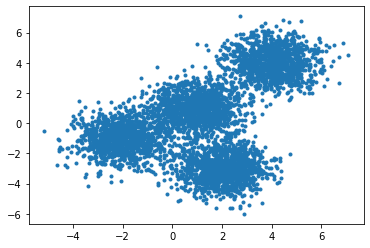

In [14]:
plt.scatter(X[:,0],X[:,1],marker = '.')

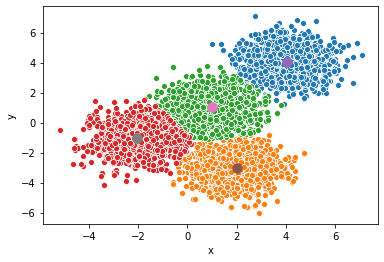

In [76]:
k_means = KMeans(init = 'k-means++',n_clusters = 4,n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
df = pd.DataFrame(k_means_labels)
df = df.rename(columns = {0:'labels'})
df2 = pd.DataFrame(X).rename(columns  = {0:'x',1:'y'})
df2['labels'] = df['labels']
zero = df2[df2['labels'] == 0][['x','y']]
one = df2[df2['labels'] == 1][['x','y']]
two = df2[df2['labels'] == 2][['x','y']]
three = df2[df2['labels'] == 3][['x','y']]
sns.scatterplot(data = zero,x = 'x',y = 'y')
sns.scatterplot(data = one,x = 'x',y = 'y')
sns.scatterplot(data = two,x = 'x',y = 'y')
sns.scatterplot(data = three,x = 'x',y = 'y')
plt.scatter(k_means.cluster_centers_[0][0],k_means.cluster_centers_[0][1],s=90)
plt.scatter(k_means.cluster_centers_[1][0],k_means.cluster_centers_[1][1],s=90)
plt.scatter(k_means.cluster_centers_[2][0],k_means.cluster_centers_[2][1],s=90)
plt.scatter(k_means.cluster_centers_[3][0],k_means.cluster_centers_[3][1],s=90)

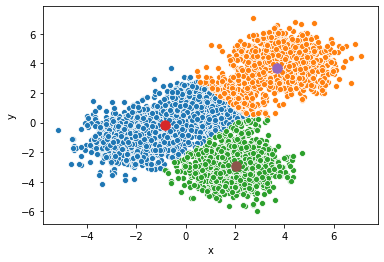

In [78]:
k_means = KMeans(init = 'k-means++',n_clusters = 3,n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
df = pd.DataFrame(k_means_labels)
df = df.rename(columns = {0:'labels'})
df2 = pd.DataFrame(X).rename(columns  = {0:'x',1:'y'})
df2['labels'] = df['labels']
zero = df2[df2['labels'] == 0][['x','y']]
one = df2[df2['labels'] == 1][['x','y']]
two = df2[df2['labels'] == 2][['x','y']]
three = df2[df2['labels'] == 3][['x','y']]
sns.scatterplot(data = zero,x = 'x',y = 'y')
sns.scatterplot(data = one,x = 'x',y = 'y')
sns.scatterplot(data = two,x = 'x',y = 'y')
#sns.scatterplot(data = three,x = 'x',y = 'y')
plt.scatter(k_means.cluster_centers_[0][0],k_means.cluster_centers_[0][1],s=90)
plt.scatter(k_means.cluster_centers_[1][0],k_means.cluster_centers_[1][1],s=90)
plt.scatter(k_means.cluster_centers_[2][0],k_means.cluster_centers_[2][1],s=90)
#plt.scatter(k_means.cluster_centers_[3][0],k_means.cluster_centers_[3][1],s=90)

In [79]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-02-20 18:31:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2020-02-20 18:31:35 (1.49 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [102]:
import pandas as pd
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [105]:
df = df.fillna(0)

In [106]:
df.drop(columns = ['Address'],inplace = True)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clust_data = sc.fit_transform(df)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [109]:
clust_data

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.03863257,
         1.90913822,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [110]:
k_means = KMeans(n_clusters = 3,n_init = 12)
k_means.fit(clust_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
k_means.labels_

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,

In [113]:
df['labels'] = k_means.labels_

In [115]:
df.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646


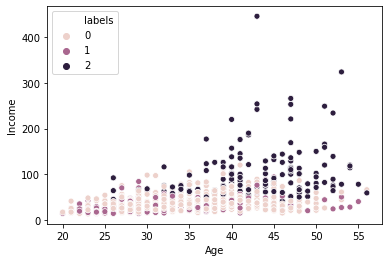

In [117]:
sns.scatterplot(data = df,x='Age',y = 'Income',hue = 'labels')

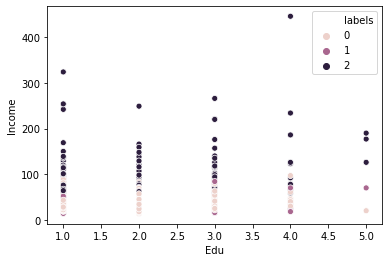

In [119]:
sns.scatterplot(data = df,x='Edu',y = 'Income',hue = 'labels')

In [118]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,0.0,6.8,0
846,847,28,2,7,34,0.359,2.021,0.0,7.0,0
847,848,25,4,0,18,2.802,3.210,1.0,33.4,1
848,849,32,1,12,28,0.116,0.696,0.0,2.9,0
